#[Your_name]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [2]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
import re
import numpy
from cleantext import clean

Download data

In [ ]:
# !wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [ ]:
# !unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [5]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
validation_file_path = 'test.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
validation_data = pd.read_csv(validation_file_path)
# train_data.head(10)

In [32]:
# test_data.head(10)

In [33]:
# validation_data.head(10)

In [69]:
#drop_duplicates يزيل الصفوف المتكرره
#dropna يحذف الصفوف المكررة
test_data=test_data.drop_duplicates().dropna()
train_data=train_data.drop_duplicates().dropna()
validation_data=validation_data.drop_duplicates().dropna()
# train_data.head(10)

In [35]:
# test_data.head(10)

In [36]:
# validation_data.head(10)

## [1.2]

In [6]:
def unify_specialty(name):
    name = re.sub(r"[^\w\s]", " ", name)  # يزيل الرموز الترقيمية
    name = re.sub(r"\s+", " ", name).strip()  # يزيل الفراغات المتكرره #strip يزيل الفراغات يلي بالبداية والنهاية
    name =re.sub("[\_\-]"," ",name)
    return name

train_data['label']=train_data['label'].apply(unify_specialty)
test_data['label']=test_data['label'].apply(unify_specialty)
validation_data['label']=validation_data['label'].apply(unify_specialty)   


In [8]:
x=set(validation_data['label'])
x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الاورام الخبيثة والحميدة',
 'الجهاز التنفسي',
 'الدم',
 'السكري',
 'الغدد الصماء',
 'امراض الجهاز التنفسي',
 'امراض الدم',
 'امراض الغدد الصماء',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

In [13]:
Dictionary_of_diseases= {
    'أمراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'امراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'أمراض الدم': 'أمراض الدم',
    'الدم': 'أمراض الدم',
    'امراض الدم': 'أمراض الدم',
    'أمراض الغدد الصماء': 'أمراض الغدد الصماء',
    'الغدد الصماء': 'أمراض الغدد الصماء',
    'امراض الغدد الصماء': 'أمراض الغدد الصماء',
    'مرض السكري': 'مرض السكري',
    'السكري': 'مرض السكري',
    'الاورام الخبيثة والحميدة':'الأمراض الخبيثة والحميدة'

}

def Unification_name_of_diseases(c):
    c=c.map(Dictionary_of_diseases).fillna(c)
    return c

In [14]:
train_data['label']=Unification_name_of_diseases(train_data['label'])
test_data['label']=Unification_name_of_diseases(test_data['label'])
validation_data['label']=Unification_name_of_diseases(validation_data['label'])

In [15]:
x=set(validation_data['label'])
x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الأمراض الخبيثة والحميدة',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

In [25]:
train_data

,question,answer,label
0,\r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...,\r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...,أمراض الدم
1,\r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...,\r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...,الأمراض الخبيثة والحميدة
2,\r\nحلول منزلية لأعراض ارتفاع ضغط الدم,\r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...,جراحة عامة
3,\r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...,\r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...,أمراض الجهاز التنفسي
4,\r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...,\r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...,مرض السكري
...,...,...,...
52753,\r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...,\r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...,جراحة عامة
52754,\r\nهل يمكن ان يرتفع السكر الى 570 دون اعراض م...,\r\n\r\nليس بالضرورة وجود اعراض ويجب المتابعة ...,مرض السكري
52755,\r\nهل يمكن علاج سرطان الثدى المرحله الثانيه ف...,\r\n\r\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه ...,الأمراض الخبيثة والحميدة
52756,\r\nاعاني من دوخه ونسبه السكر من 69 الى 80 بشك...,"\r\n\r\nسلامتك ان شاء الله , قد يكون طبيعي بنق...",مرض السكري


# Question [2]: Text Analysis

## [2.1] 


In [33]:
train_data

,question,answer,label
0,\r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...,\r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...,أمراض الدم
1,\r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...,\r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...,الأمراض الخبيثة والحميدة
2,\r\nحلول منزلية لأعراض ارتفاع ضغط الدم,\r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...,جراحة عامة
3,\r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...,\r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...,أمراض الجهاز التنفسي
4,\r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...,\r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...,مرض السكري
...,...,...,...
52753,\r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...,\r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...,جراحة عامة
52754,\r\nهل يمكن ان يرتفع السكر الى 570 دون اعراض م...,\r\n\r\nليس بالضرورة وجود اعراض ويجب المتابعة ...,مرض السكري
52755,\r\nهل يمكن علاج سرطان الثدى المرحله الثانيه ف...,\r\n\r\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه ...,الأمراض الخبيثة والحميدة
52756,\r\nاعاني من دوخه ونسبه السكر من 69 الى 80 بشك...,"\r\n\r\nسلامتك ان شاء الله , قد يكون طبيعي بنق...",مرض السكري


In [63]:
# Train data

# عدد الأجوبة الخاصة بأمراض الدم :
answers_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['answer'].tolist())
# print(answers_len_in_blood_diseases)

# عدد الأسئلة الخاصة بأمراض الدم :
questions_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['question'].tolist())
# print(questions_len_in_blood_diseases)


# العدد الكلي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الدم'])
print('عدد الداتا الخاصة بأمراض الدم:',total_blood_diseases_len)

# عدد الداتا في أمراض الجهاز التنفسي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الجهاز التنفسي'])
print('عدد الداتا الخاصة بأمراض الجهاز التنفسي:',total_blood_diseases_len)

# غدد الداتا في أمراض الغدد الصماء :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الغدد الصماء'])
print('عدد الداتا الخاصة بأمراض الغدد الصماء:',total_blood_diseases_len)

# عدد  الداتا ارتفاع ضغط الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='ارتفاع ضغط الدم'])
print('عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم:',total_blood_diseases_len)

# عدد الداتا في الأمراض الخبيثة والحميدة :
total_blood_diseases_len = len(train_data[train_data['label']=='الأمراض الخبيثة والحميدة'])
print('عدد الداتا الخاصة بالأمراض الخبيثة والحميدة:',total_blood_diseases_len)

# عدد الداتا في جراحة العظام
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة العظام'])
print('عدد الداتا الخاصة بجراحةالعظام:',total_blood_diseases_len)

# عدد الداتا في الجراحة العامة
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة عامة'])
print('عدد الداتا الخاصة بالجراحة العامة:',total_blood_diseases_len)

# عدد الداتا في مرض السكري
total_blood_diseases_len = len(train_data[train_data['label']=='مرض السكري'])
print('عدد الداتا الخاصة بمرض السكري:',total_blood_diseases_len)


عدد الداتا الخاصة بأمراض الدم: 2153
عدد الداتا الخاصة بأمراض الجهاز التنفسي: 6002
عدد الداتا الخاصة بأمراض الغدد الصماء: 9417
عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم: 4190
عدد الداتا الخاصة بالأمراض الخبيثة والحميدة: 10711
عدد الداتا الخاصة بجراحةالعظام: 2641
عدد الداتا الخاصة بالجراحة العامة: 10548
عدد الداتا الخاصة بمرض السكري: 7096


                  Specialization  Number of Texts
0                 Blood Diseases             2153
1    Respiratory System Diseases             6002
2             Endocrine Diseases             9417
3                   Hypertension             4190
4  Malignant and Benign Diseases            10711
5             Orthopedic Surgery             2641
6                General Surgery            10548
7                       Diabetes             7096


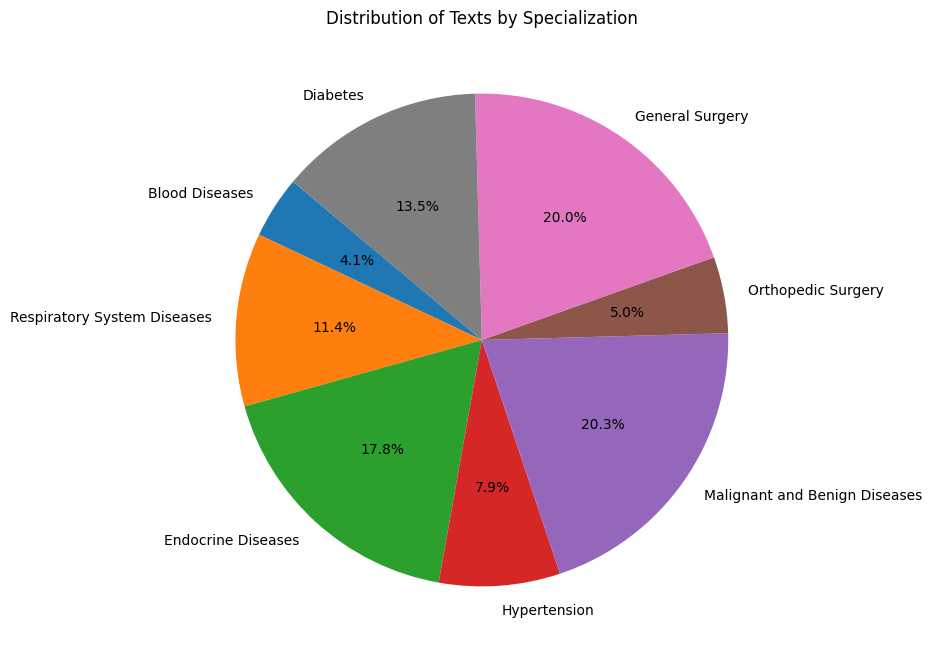

In [66]:
# Drawing pie chart:
# ملاحظة بالعربي طلع الخط مفشكل ف تمت الكتابة بالانكليزي



# data = {
#     'الاختصاص': ['أمراض الدم', 'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء','أمراض ارتفاع ضغط الدم','الأمراض الخبيثة والحميدة','جراحةالعظام','الجراحة العامة','مرض السكري'],
#     'عدد النصوص': [2153, 6002, 9417,4190,10711,2641,10548,7096]
# }

# data


# df = pd.DataFrame(data)

# print(df)

# plt.figure(figsize=(8, 8))
# plt.pie(df['عدد النصوص'], labels=df['الاختصاص'], autopct='%1.1f%%', startangle=140)
# plt.title('توزيع النصوص حسب الاختصاص')
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Specialization': ['Blood Diseases', 'Respiratory System Diseases', 'Endocrine Diseases', 'Hypertension', 'Malignant and Benign Diseases', 'Orthopedic Surgery', 'General Surgery', 'Diabetes'],
    'Number of Texts': [2153, 6002, 9417, 4190, 10711, 2641, 10548, 7096]
}

df = pd.DataFrame(data)

print(df)

plt.figure(figsize=(8, 8))
plt.pie(df['Number of Texts'], labels=df['Specialization'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Texts by Specialization')
plt.show()


## [2.2] 

## [2.3] 

## [2.4] 

## [2.5] 

# Question [3]: Text Cleaning and Normalization

## [3.1] 


## [3.2] 

## [3.3] 

## [3.4] 

## [3.5]

### [3.5.1] 

### [3.5.2] 

### [3.5.3] 

### [3.5.4]

## [3.6] 

### [3.6.1] 

### [3.6.2] 

## [3.7] 

## [3.8] 

## [3.9] 

### [3.9.1] 

### [3.9.2] 

### [3.9.3] 

### [3.9.4] 

## [3.10] 

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1] 


## [4.2] 

## [4.3] 

## [4.4] 

# Question [5]: Baseline

The Comparison Dictionary example

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove links")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

## [5.2]

## [5.3]

## [5.4]

## [5.5]

## [5.6]

# Question [6]: Semantic Representation

## [6.1]

## [6.2]

## [6.3]

## [6.4]

## [6.5]

# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

### [7.1.2]

## [7.2]

### [7.2.1]

### [7.2.2]

### [7.2.3]

### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)